#Importing needed libraries


In [1]:
! pip install pingouin and statannotations

import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from scipy import stats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for and: filename=and-66.0.2-py3-none-any.whl size=1116 sha256=fc6fdb2d66bf9ca688dfb0eb34937156d4cbbaafa30a16a0dca2c5b86a4841c9
  Stored in directory: /root/.cache/pip/wheels/0f/45/d9/f05332b633f88600e85fd17d736a01d48d816691ffbddcadf4
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=dc44cfd60e7f953eec622d2d6f6133fb70b03adc5736c431bac0fc5a7428910e
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built and littleutils
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not c

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Reading Our Dataframe



In [2]:
df=pd.read_excel('Data E5.xlsx')
list(df)

['Patient No.',
 'Age (years)',
 'Height (m)',
 'Height (cm)',
 'Weight Pre (kg)',
 'IdealBodyWeight',
 'ExcessBodyWeigh',
 'Weight 12 (kg)',
 'Weight 48 (kg)',
 'BMI Pre (kg/m2)',
 'BMI 12 (kg/m2)',
 'BMI 48 (kg/m2)',
 'Fat mass Pre (Kg)',
 'Fat mass 12 (Kg)',
 'Fat mass 48 (Kg)',
 'Fat-free mass Pre (kg)',
 'Fat-free mass 12 (kg)',
 'Fat-free mass 48 (kg)',
 'Excess weight loss 12 (%)',
 '12-Month Failure',
 'Excess weight loss 48 (%)',
 '48-Month Failure',
 'FBS Pre (mg/dL)',
 'FBS 12 (mg/dL)',
 'FBS 48 (mg/dL)',
 'HbA1c Pre (mg/dL)',
 'HbA1c 12 (mg/dL)',
 'HbA1c 48 (mg/dL)',
 'AST Pre (U/L)',
 'AST 12 (U/L)',
 'AST 48 (U/L)',
 'ALT Pre (U/L)',
 'ALT 12 (U/L)',
 'ALT 48 (U/L)',
 'Exersice type Pre',
 'Exersice type 12',
 'Exersice type 48',
 'Exercise intensity pre',
 'Exercise intensity 12',
 'Exercise intensity 48',
 'Exercise min/day Pre (minute)',
 'Exercise min/day 12 (minute)',
 'Exercise min/day 48 (minute)',
 'Exercise session/week pre',
 'Exercise session/week 12',
 'Exerci

#defining some useful function

##Comparing two columns of a dataframe, returing the CI, Mean difference and statistical significance as asterix

In [3]:
def Mean_diff_P_value(dataframe, first_column, second_column):
  test=pg.ttest(dataframe[first_column],dataframe[second_column],paired=True)

  p_val=test['p-val'][0]
  if p_val>5.00e-02 and p_val <= 1.00e+00:
    asterix='NS'
  elif  p_val> 1.00e-02 and p_val<= 5.00e-02:
    asterix='*'
  elif p_val>1.00e-03 and  p_val<= 1.00e-02:
    asterix='**'
  elif p_val>1.00e-04 and p_val <= 1.00e-03:
    asterix='***'
  elif p_val<= 1.00e-04:
    asterix='****'

  mean_diff=test['CI95%'][0][0]+(test['CI95%'][0][1]-test['CI95%'][0][0])/2

  CI=str(test['CI95%'][0])
  mean_diff='%.2f'%mean_diff
  output='%s \n %s \n %s'%(mean_diff, CI, asterix)
  return(output)

##Comparing columns of data, visualize the comparison as boxplots and annotate the statistical diffirenece



In [4]:
def compare_and_plot(column_1,column_2,column_3,variable_name,ax):
  Df=df[[column_1,column_2,column_3]]
  Df_pg_adjusted=pd.melt(Df,var_name='time_period', value_name=variable_name)


  pairs=[(column_3, column_2), (column_2, column_1), (column_1,column_3)]
  Weight_order=[column_3,column_2,column_1]
  Df=df[[column_3,column_2,column_1]]

  line=sns.lineplot(ax=ax,data=Df.transpose(),dashes=False, marker=True,legend=False,zorder=-1)
  g=line.get_lines()

  [l.set_color('Grey') for l in g ]

  ax=sns.boxplot(ax=ax, data=Df_pg_adjusted, x='time_period', y=variable_name, order=Weight_order)
  ax=sns.scatterplot(ax=ax, data=Df_pg_adjusted, x='time_period', y=variable_name, zorder=-1,alpha=0.3)

  pairs=[(column_3, column_2), (column_3, column_1), (column_1, column_2)]

  one=Mean_diff_P_value(df, column_2,column_3)
  two=Mean_diff_P_value(df, column_2,column_1)
  three=Mean_diff_P_value(df, column_1,column_3)

  formatted=[two,three,one]
  annotator=Annotator(ax, pairs, plot='boxplot', data=Df_pg_adjusted, x='time_period', y=variable_name, engine='seaborn')
  annotator.set_custom_annotations(formatted)
  annotator.annotate()

##Drawing dot plots and annotating the pearson correlation coefficent



In [ ]:
def pearson_stat_and_plot(name_of_xaxis,name_of_yaxis,dataframe,ax):
  ax=sns.regplot(ax=ax,x=name_of_xaxis, y=name_of_yaxis, data=dataframe)

  r,p=stats.pearsonr(dataframe[name_of_xaxis],dataframe[name_of_yaxis])
  print(type(ax))
  x=ax.get_xlim()
  y=ax.get_ylim()
  ax.text((x[1]-x[0])*0.1+x[0], (y[1]-y[0])*1.005+y[0], "R=%.2f, P=%.2f"%(r,p))

##Drawing boxplots of data and annotate the corresponding number of data on each box.



In [9]:
def paired_box_plots(vertical, horizontal,limit, lower_limit_title, upper_limit_title, vertical_title, horizontal_title,ax,limit_1=None,middle_limit_title=None):
  Df=df[[ horizontal,vertical]]
  Df_1=Df.loc[Df[ horizontal]>=limit]
  Df_1.loc[Df_1[horizontal]>=limit, horizontal]=upper_limit_title
  if limit_1!=None and middle_limit_title!=None:
    Df_2=Df.loc[(Df[ horizontal]<limit) & (Df[horizontal]>=limit_1)]
    Df_2.loc[(Df_2[ horizontal]<limit) & (Df_2[horizontal]>=limit_1), horizontal]=middle_limit_title

    Df_3=Df.loc[Df[ horizontal]<limit_1]
    Df_3.loc[Df_3[ horizontal]<limit_1, horizontal]=lower_limit_title

    Df=pd.concat([Df_3,Df_2,Df_1])


  else:
    Df_2=Df.loc[Df[ horizontal]<limit]
    Df_2.loc[Df_2[ horizontal]<limit, horizontal]=lower_limit_title

    Df=pd.concat([Df_2,Df_1])

  Df=Df.rename(columns={ horizontal:horizontal_title,vertical:vertical_title})
  N1= (Df[horizontal_title]==lower_limit_title).sum()
  N2= (Df[horizontal_title]==upper_limit_title).sum()

  if limit_1!=None and middle_limit_title!=None:

    N3= (Df[horizontal_title]==middle_limit_title).sum()

  ax=sns.scatterplot(ax=ax, data=Df, x=horizontal_title, y=vertical_title,zorder=-1,alpha=0.0, legend=False)
  ax=sns.boxplot(ax=ax,data=Df, x=horizontal_title, y=vertical_title)
  ax=sns.swarmplot(ax=ax, data=Df, x=horizontal_title, y=vertical_title,hue=horizontal_title, zorder=-1)
  Df=Df.groupby([horizontal_title]).max()
  x1=Df.loc[lower_limit_title,vertical_title]
  x2=Df.loc[upper_limit_title,vertical_title]

  if limit_1!=None and middle_limit_title!=None:

    x3=Df.loc[middle_limit_title,vertical_title]

  ax.text(lower_limit_title,x1*1.025,'N=%s'%N1,ha='center' )
  ax.text(upper_limit_title,x2*1.025,'N=%s'%N2,ha='center')
  if limit_1!=None and middle_limit_title!=None:

    ax.text(middle_limit_title,x3*1.025,'N=%s'%N3,ha='center')

  y_length=ax.get_ylim()[1]-ax.get_ylim()[0]
  plt.ylim(0,y_length*1.1)



##Drawing boxplots of data, and annotate the statistical significance

In [14]:
def paired_plots(vertical_1, vertical_2, horizontal, limit, lower_limit_title, upper_limit_title,total_title, vertical_title,ax_1, middle_limit_title=None, limit_1=None, y_axis_limit=None, legend=None):
  Df=df[[vertical_1,vertical_2,horizontal]]
  Df_1=Df.loc[Df[ horizontal]>=limit]
  Df_1.loc[Df_1[horizontal]>=limit, horizontal]=upper_limit_title
  if limit_1!=None and middle_limit_title!=None:
    Df_2=Df.loc[(Df[ horizontal]<limit) & (Df[horizontal]>=limit_1)]
    Df_2.loc[(Df_2[ horizontal]<limit) & (Df_2[horizontal]>=limit_1), horizontal]=middle_limit_title

    Df_3=Df.loc[Df[ horizontal]<limit_1]
    Df_3.loc[Df_3[ horizontal]<limit_1, horizontal]=lower_limit_title

    Df=pd.concat([Df_3,Df_2,Df_1])


  else:
    Df_2=Df.loc[Df[ horizontal]<limit]
    Df_2.loc[Df_2[ horizontal]<limit, horizontal]=lower_limit_title

    Df=pd.concat([Df_2,Df_1])


  Df_1=Df.copy()
  Df_1[horizontal]=total_title
  Df_new=pd.concat([Df, Df_1],axis=0)

  Df_new_adjusted=pd.melt(Df_new, id_vars=[horizontal], value_name=vertical_title, var_name='time')
  if y_axis_limit != None:
    ax_1.set(ylim=(3,11))
  if legend==None:
    ax_1=sns.boxplot(ax=ax_1,data=Df_new_adjusted, x=horizontal,y=vertical_title,hue='time')
    ax_1=sns.swarmplot(ax=ax_1,data=Df_new_adjusted, x=horizontal,y=vertical_title,hue='time',dodge=True,zorder=-1)
    handles, labels = [],[]

    ax_1.legend(handles[:2], labels[:2],fontsize='small')

  else:
    ax_1=sns.boxplot(ax=ax_1,data=Df_new_adjusted, x=horizontal,y=vertical_title,hue='time')
    ax_1=sns.swarmplot(ax=ax_1,data=Df_new_adjusted, x=horizontal,y=vertical_title,hue='time',dodge=True,zorder=-1)
    handles, labels = ax_1.get_legend_handles_labels()
    ax_1.legend(handles[:2], labels[:2],fontsize='small')
    sns.move_legend(
    ax_1, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
        )
  X=1

  Df_low_activity=Df[Df[horizontal]==lower_limit_title]
  Df_Active=Df[Df[horizontal]==upper_limit_title]
  if middle_limit_title!=None:
      Df_middle_activity=Df[Df[horizontal]==middle_limit_title]
      X=0



  Mean_diff_low_Activity=Mean_diff_P_value(Df_low_activity,vertical_2,vertical_1)
  Mean_diff_Active=Mean_diff_P_value(Df_Active,vertical_2,vertical_1)
  Mean_diff_All=Mean_diff_P_value(Df,vertical_2,vertical_1)
  annotations=[Mean_diff_low_Activity,Mean_diff_Active, Mean_diff_All]
  pairs=[
       [(lower_limit_title,vertical_1),(lower_limit_title,vertical_2)],
       [(upper_limit_title ,vertical_1),(upper_limit_title,vertical_2)],
        [(total_title,vertical_1),(total_title,vertical_2)]
  ]

  if X==0:
    pairs=[       [(lower_limit_title,vertical_1),(lower_limit_title,vertical_2)],
       [(upper_limit_title ,vertical_1),(upper_limit_title,vertical_2)],
        [(total_title,vertical_1),(total_title,vertical_2)],
                   [(middle_limit_title,vertical_1),(middle_limit_title,vertical_2)] ]
    Mean_diff_Middle=Mean_diff_P_value(Df_middle_activity,vertical_2,vertical_1)
    annotations=[Mean_diff_low_Activity,Mean_diff_Active, Mean_diff_All, Mean_diff_Middle]
  annotator=Annotator(ax_1, pairs, plot='boxplot', data=Df_new_adjusted, x=horizontal,y=vertical_title,hue='time', engine='seaborn')
  annotator.annotate_custom_annotations(annotations)










#Applying the function to the desired columns

## Figure 1

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Weight 12 (kg) vs. Weight Pre (kg): -3.84 
 [-4.41 -3.27] 
 ****
Weight 48 (kg) vs. Weight 12 (kg): -31.80 
 [-32.58 -31.03] 
 ****
Weight 48 (kg) vs. Weight Pre (kg): -27.96 
 [-28.9  -27.03] 
 ****
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

BMI 12 (kg/m2) vs. BMI Pre (kg/m2): -1.53 
 [-1.76 -1.3 ] 
 ****
BMI 48 (kg/m2) vs. BMI 12 (kg/m2): -12.79 
 [-13.14 -12.45] 
 ****
BMI 48 (kg/m2) vs. BMI Pre (kg/m2): -11.27 
 [-11.67 -10.86] 
 ****
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FBS 12 (mg/dL) vs. FBS P

Text(0.05, -0.05, 'Figure 1. The mean difference (and confidence interval) of longitudinal changes in weight, body mass index, glucose profile, and exercise time among female patients undergoing sleeve bariatric surgery.\n(Footnote: Parametric test of Paired T-test was used to evaluate longitudinal changes. The exact numbers for average and mean differences are also available in the supplementary file.\nAbbreviations: ****: P-value<0.001, NS: not significant, BMI: body mass index, FBS: fasting blood glucose, HbA1c: hemoglobin A1c)')

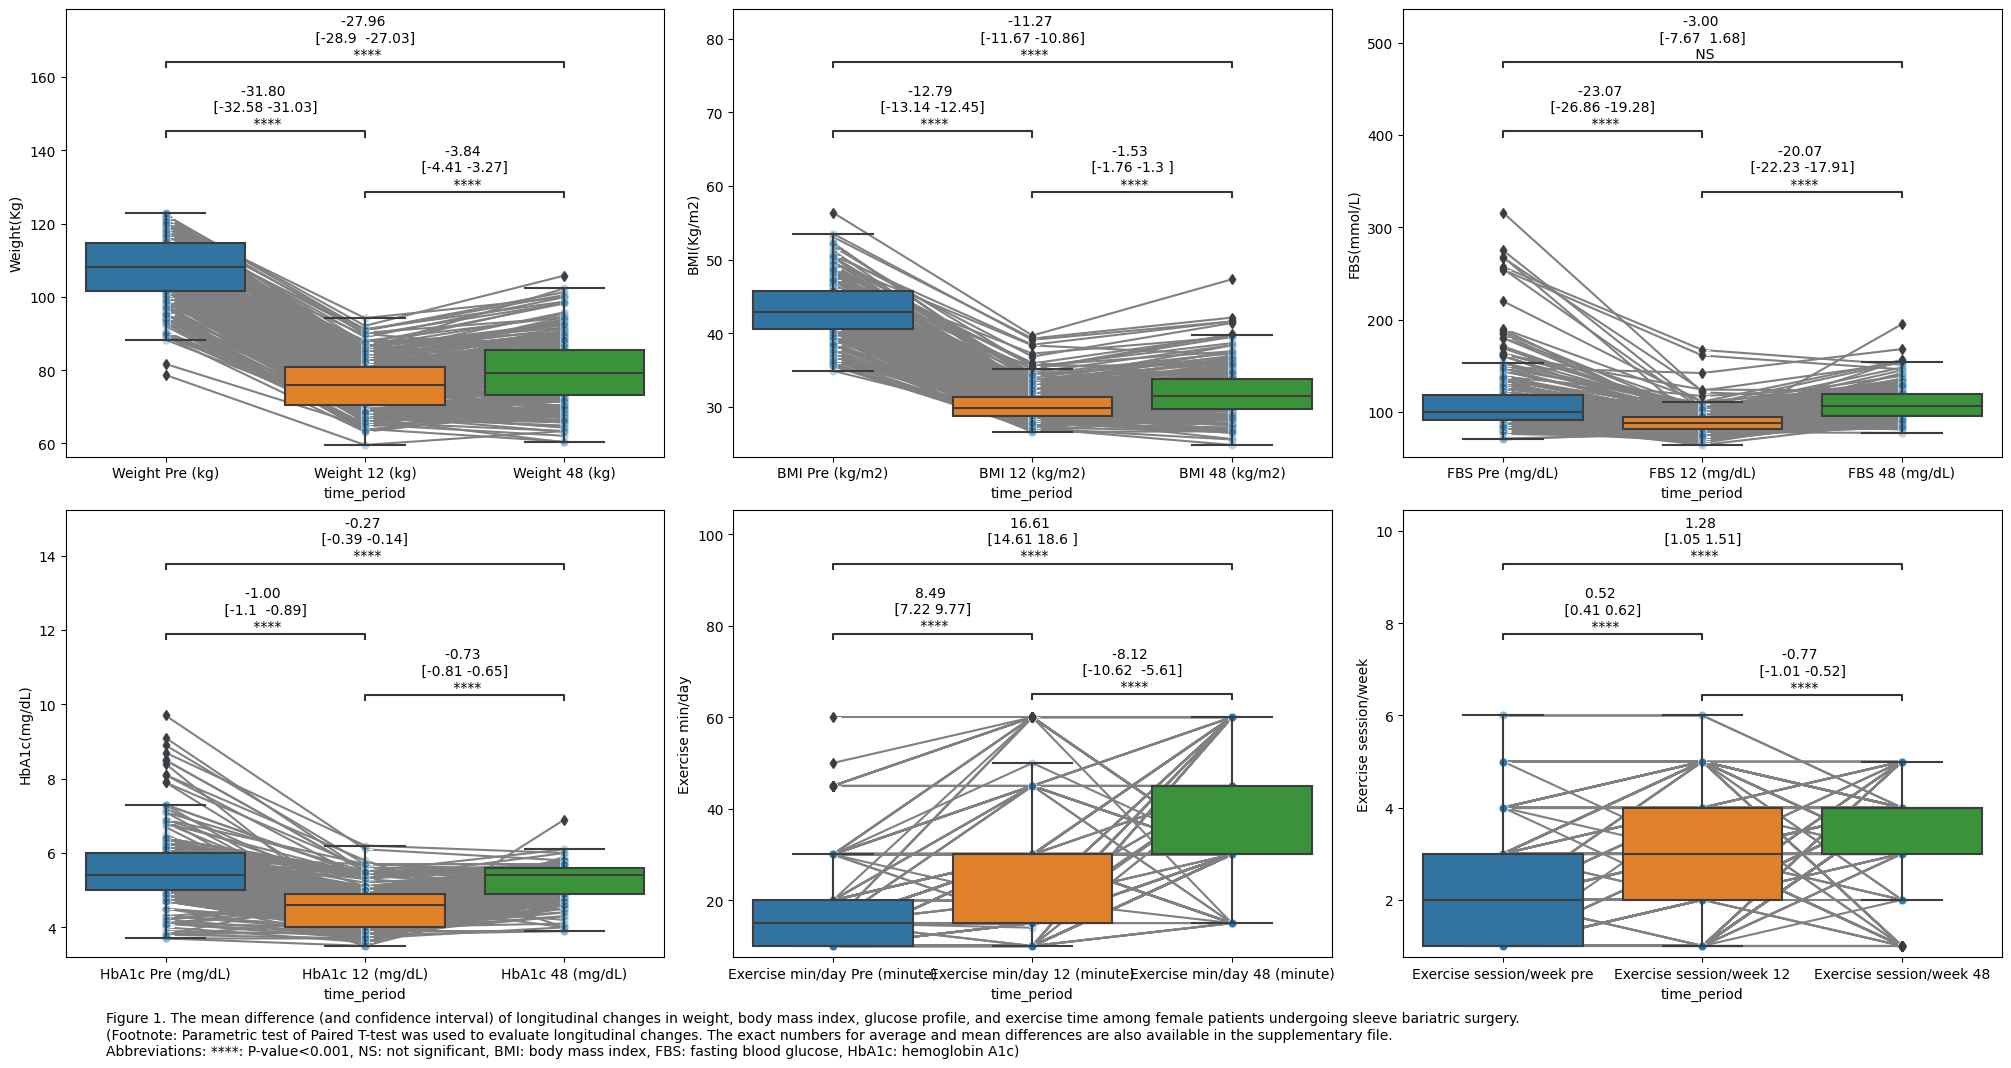

In [5]:
fig_1, axs = plt.subplots(2, 3,figsize=(20,10), layout='constrained')
compare_and_plot('Weight 48 (kg)','Weight 12 (kg)', 'Weight Pre (kg)', 'Weight(Kg)',axs[0,0])
compare_and_plot( 'BMI 48 (kg/m2)','BMI 12 (kg/m2)','BMI Pre (kg/m2)','BMI(Kg/m2)',axs[0,1])
compare_and_plot('FBS 48 (mg/dL)','FBS 12 (mg/dL)','FBS Pre (mg/dL)','FBS(mmol/L)',axs[0,2])
compare_and_plot( 'HbA1c 48 (mg/dL)', 'HbA1c 12 (mg/dL)', 'HbA1c Pre (mg/dL)', 'HbA1c(mg/dL)',axs[1,0])
compare_and_plot('Exercise min/day 48 (minute)','Exercise min/day 12 (minute)','Exercise min/day Pre (minute)','Exercise min/day',axs[1,1])
compare_and_plot('Exercise session/week 48','Exercise session/week 12','Exercise session/week pre','Exercise session/week',axs[1,2])
plt.figtext(0.05,-0.05 , 'Figure 1. The mean difference (and confidence interval) of longitudinal changes in weight, body mass index, glucose profile, and exercise time among female patients undergoing sleeve bariatric surgery.\n(Footnote: Parametric test of Paired T-test was used to evaluate longitudinal changes. The exact numbers for average and mean differences are also available in the supplementary file.\nAbbreviations: ****: P-value<0.001, NS: not significant, BMI: body mass index, FBS: fasting blood glucose, HbA1c: hemoglobin A1c)')

##Figure 2

<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>


Text(0.05, -0.05, 'Figure 2. Relation of glucose profile and exercise time among female patients who underwent sleeve bariatric surgery.\n(Footnote: Pearson’s correlation coefficient is used to evaluate the relation of numerical tests.) \nAbbreviation: FBS: fasting blood glucose, HbA1c: hemoglobin A1c. ')

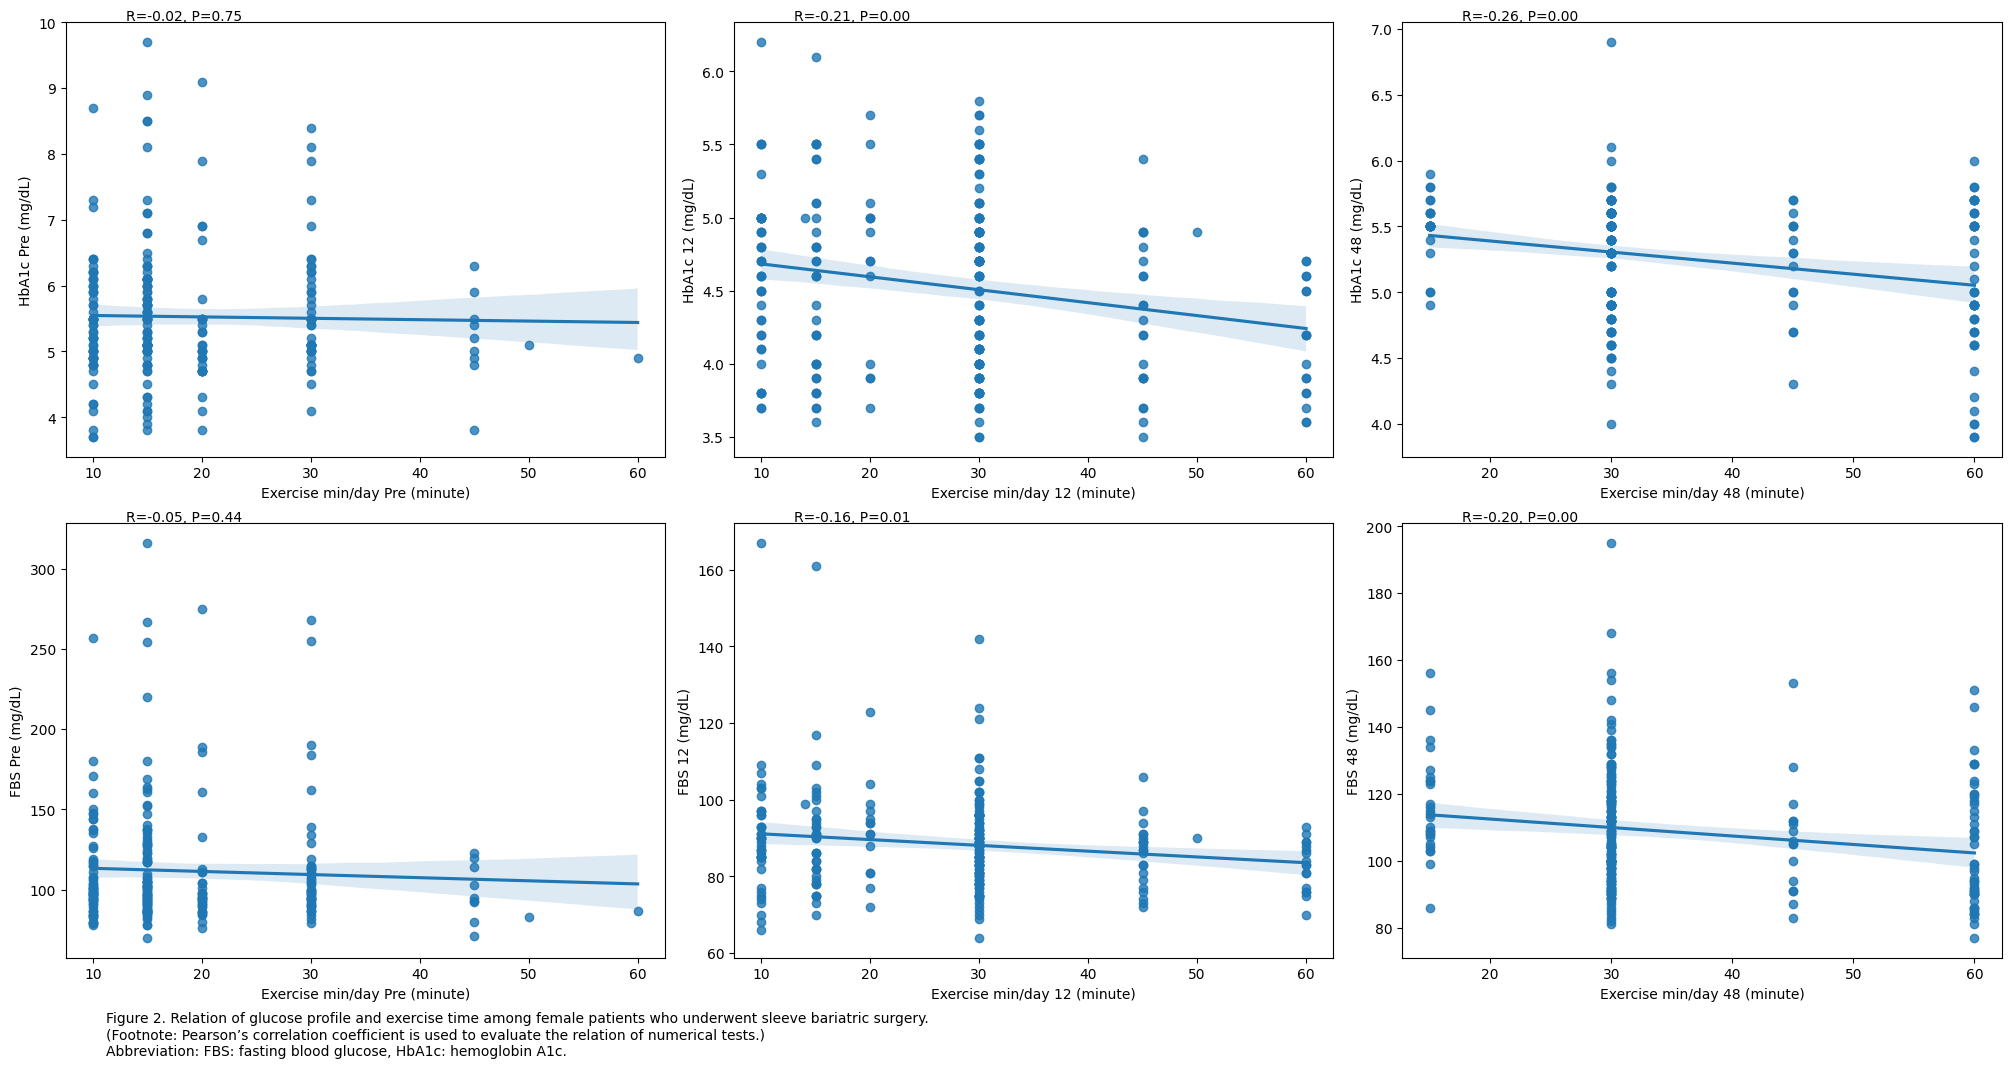

In [7]:
fig, axs = plt.subplots(2, 3,figsize=(20,10), layout='constrained')
pearson_stat_and_plot('Exercise min/day Pre (minute)','HbA1c Pre (mg/dL)',df, axs[0,0])
pearson_stat_and_plot('Exercise min/day 12 (minute)','HbA1c 12 (mg/dL)',df,axs[0,1])
pearson_stat_and_plot('Exercise min/day 48 (minute)','HbA1c 48 (mg/dL)',df,axs[0,2])
pearson_stat_and_plot('Exercise min/day Pre (minute)','FBS Pre (mg/dL)',df,axs[1,0])
pearson_stat_and_plot('Exercise min/day 12 (minute)','FBS 12 (mg/dL)',df,axs[1,1])
pearson_stat_and_plot('Exercise min/day 48 (minute)','FBS 48 (mg/dL)',df,axs[1,2])
plt.figtext(0.05,-0.05,'Figure 2. Relation of glucose profile and exercise time among female patients who underwent sleeve bariatric surgery.\n(Footnote: Pearson’s correlation coefficient is used to evaluate the relation of numerical tests.) \nAbbreviation: FBS: fasting blood glucose, HbA1c: hemoglobin A1c. ')

##Figure 3

<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>


Text(0.1, -0.05, 'Figure 3. Relation of excess weight loss with exercise time and HbA1c level among female patients who underwent sleeve bariatric surgery.\n(Footnote: Pearson’s correlation coefficient is used to evaluate the relation of numerical tests.\nAbbreviation: HbA1c: hemoglobin A1c)')

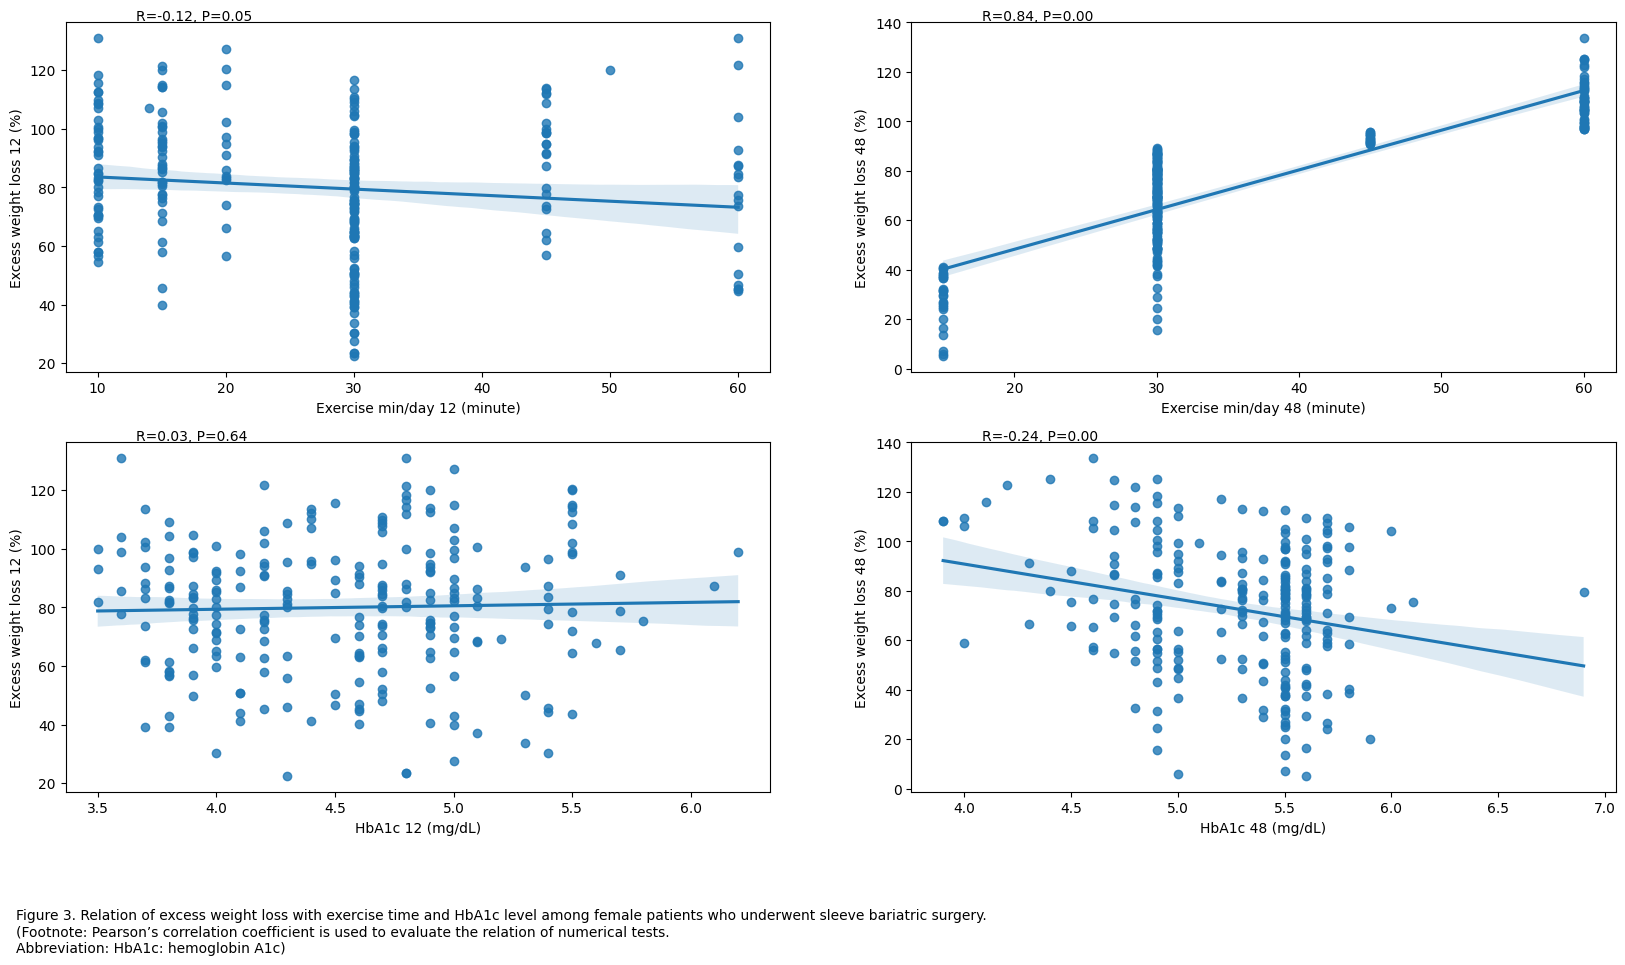

In [8]:
fig, ax=plt.subplots(2,2, figsize=(20, 10))
pearson_stat_and_plot('Exercise min/day 12 (minute)','Excess weight loss 12 (%)',df, ax[0,0])
pearson_stat_and_plot('Exercise min/day 48 (minute)','Excess weight loss 48 (%)',df, ax[0,1])
pearson_stat_and_plot('HbA1c 12 (mg/dL)','Excess weight loss 12 (%)',df, ax[1,0])
pearson_stat_and_plot('HbA1c 48 (mg/dL)','Excess weight loss 48 (%)',df, ax[1,1])
plt.figtext(0.1,-0.05,'Figure 3. Relation of excess weight loss with exercise time and HbA1c level among female patients who underwent sleeve bariatric surgery.\n(Footnote: Pearson’s correlation coefficient is used to evaluate the relation of numerical tests.\nAbbreviation: HbA1c: hemoglobin A1c)')

##Figure 4

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Active_BMI Pre (kg/m2) vs. Active_BMI 48 (kg/m2): -11.59 
 [-12.01 -11.18] 
 ****
Low Activity_BMI Pre (kg/m2) vs. Low Activity_BMI 48 (kg/m2): -8.47 
 [-9.45 -7.5 ] 
 ****
All_BMI Pre (kg/m2) vs. All_BMI 48 (kg/m2): -11.27 
 [-11.67 -10.86] 
 ****


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Active_HbA1c Pre (mg/dL) vs. Active_HbA1c 48 (mg/dL): -0.30 
 [-0.43 -0.17] 
 ****
Low Activity_HbA1c Pre (mg/dL) vs. Low Activity_HbA1c 48 (mg/dL): 0.01 
 [-0.44  0.47] 
 NS
All_HbA1c Pre (mg/dL) vs. All_HbA1c 48 (mg/dL): -0.27 
 [-0.39 -0.14] 
 ****


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Moderate_BMI Pre (kg/m2) vs. Moderate_BMI 48 (kg/m2): -11.79 
 [-12.25 -11.34] 
 ****
Low_BMI Pre (kg/m2) vs. Low_BMI 48 (kg/m2): -9.54 
 [-10.26  -8.83] 
 ****
All_BMI Pre (kg/m2) vs. All_BMI 48 (kg/m2): -11.27 
 [-11.67 -10.86] 
 ****


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.7% of the points cannot be place

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Moderate_HbA1c Pre (mg/dL) vs. Moderate_HbA1c 48 (mg/dL): -0.31 
 [-0.45 -0.17] 
 ****
Low_HbA1c Pre (mg/dL) vs. Low_HbA1c 48 (mg/dL): -0.13 
 [-0.41  0.15] 
 NS
All_HbA1c Pre (mg/dL) vs. All_HbA1c 48 (mg/dL): -0.27 
 [-0.39 -0.14] 
 ****


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 16.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

3-4 Session_BMI Pre (kg/m2) vs. 3-4 Session_BMI 48 (kg/m2): -11.44 
 [-11.89 -10.98] 
 ****
1-2 Session_BMI Pre (kg/m2) vs. 1-2 Session_BMI 48 (kg/m2): -9.05 
 [-9.96 -8.14] 
 ****
5-6 Session_BMI Pre (kg/m2) vs. 5-6 Session_BMI 48 (kg/m2): -12.80 
 [-13.96 -11.63] 
 ****
All_BMI Pre (kg/m2) vs. All_BMI 48 (kg/m2): -11.27 
 [-11.67 -10.86] 
 ****


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.9% of the points cannot be plac

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

3-4 Session_HbA1c Pre (mg/dL) vs. 3-4 Session_HbA1c 48 (mg/dL): -0.26 
 [-0.39 -0.12] 
 ***
1-2 Session_HbA1c Pre (mg/dL) vs. 1-2 Session_HbA1c 48 (mg/dL): -0.03 
 [-0.4   0.34] 
 NS
5-6 Session_HbA1c Pre (mg/dL) vs. 5-6 Session_HbA1c 48 (mg/dL): -0.64 
 [-1.11 -0.16] 
 *
All_HbA1c Pre (mg/dL) vs. All_HbA1c 48 (mg/dL): -0.27 
 [-0.39 -0.14] 
 ****


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Moderate_BMI Pre (kg/m2) vs. Moderate_BMI 48 (kg/m2): -12.18 
 [-12.99 -11.36] 
 ****
Low_BMI Pre (kg/m2) vs. Low_BMI 48 (kg/m2): -11.04 
 [-11.5  -10.59] 
 ****
All_BMI Pre (kg/m2) vs. All_BMI 48 (kg/m2): -11.27 
 [-11.67 -10.86] 
 ****


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 34.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Moderate_HbA1c Pre (mg/dL) vs. Moderate_HbA1c 48 (mg/dL): -0.32 
 [-0.65  0.02] 
 NS
Low_HbA1c Pre (mg/dL) vs. Low_HbA1c 48 (mg/dL): -0.26 
 [-0.39 -0.12] 
 ***
All_HbA1c Pre (mg/dL) vs. All_HbA1c 48 (mg/dL): -0.27 
 [-0.39 -0.14] 
 ****


Text(0.1, 0.08, 'Figure 4. The impact of exercise on the loss of excess body weight (LEBW), the mean difference of hemoglobinA1c (HbA1c), and body mass index (BMI) among the active cohort and low activity cohort who underwent sleeve gastrectomy.\n(Footnote: ****: P-value<0.001, NS: not significant) ')

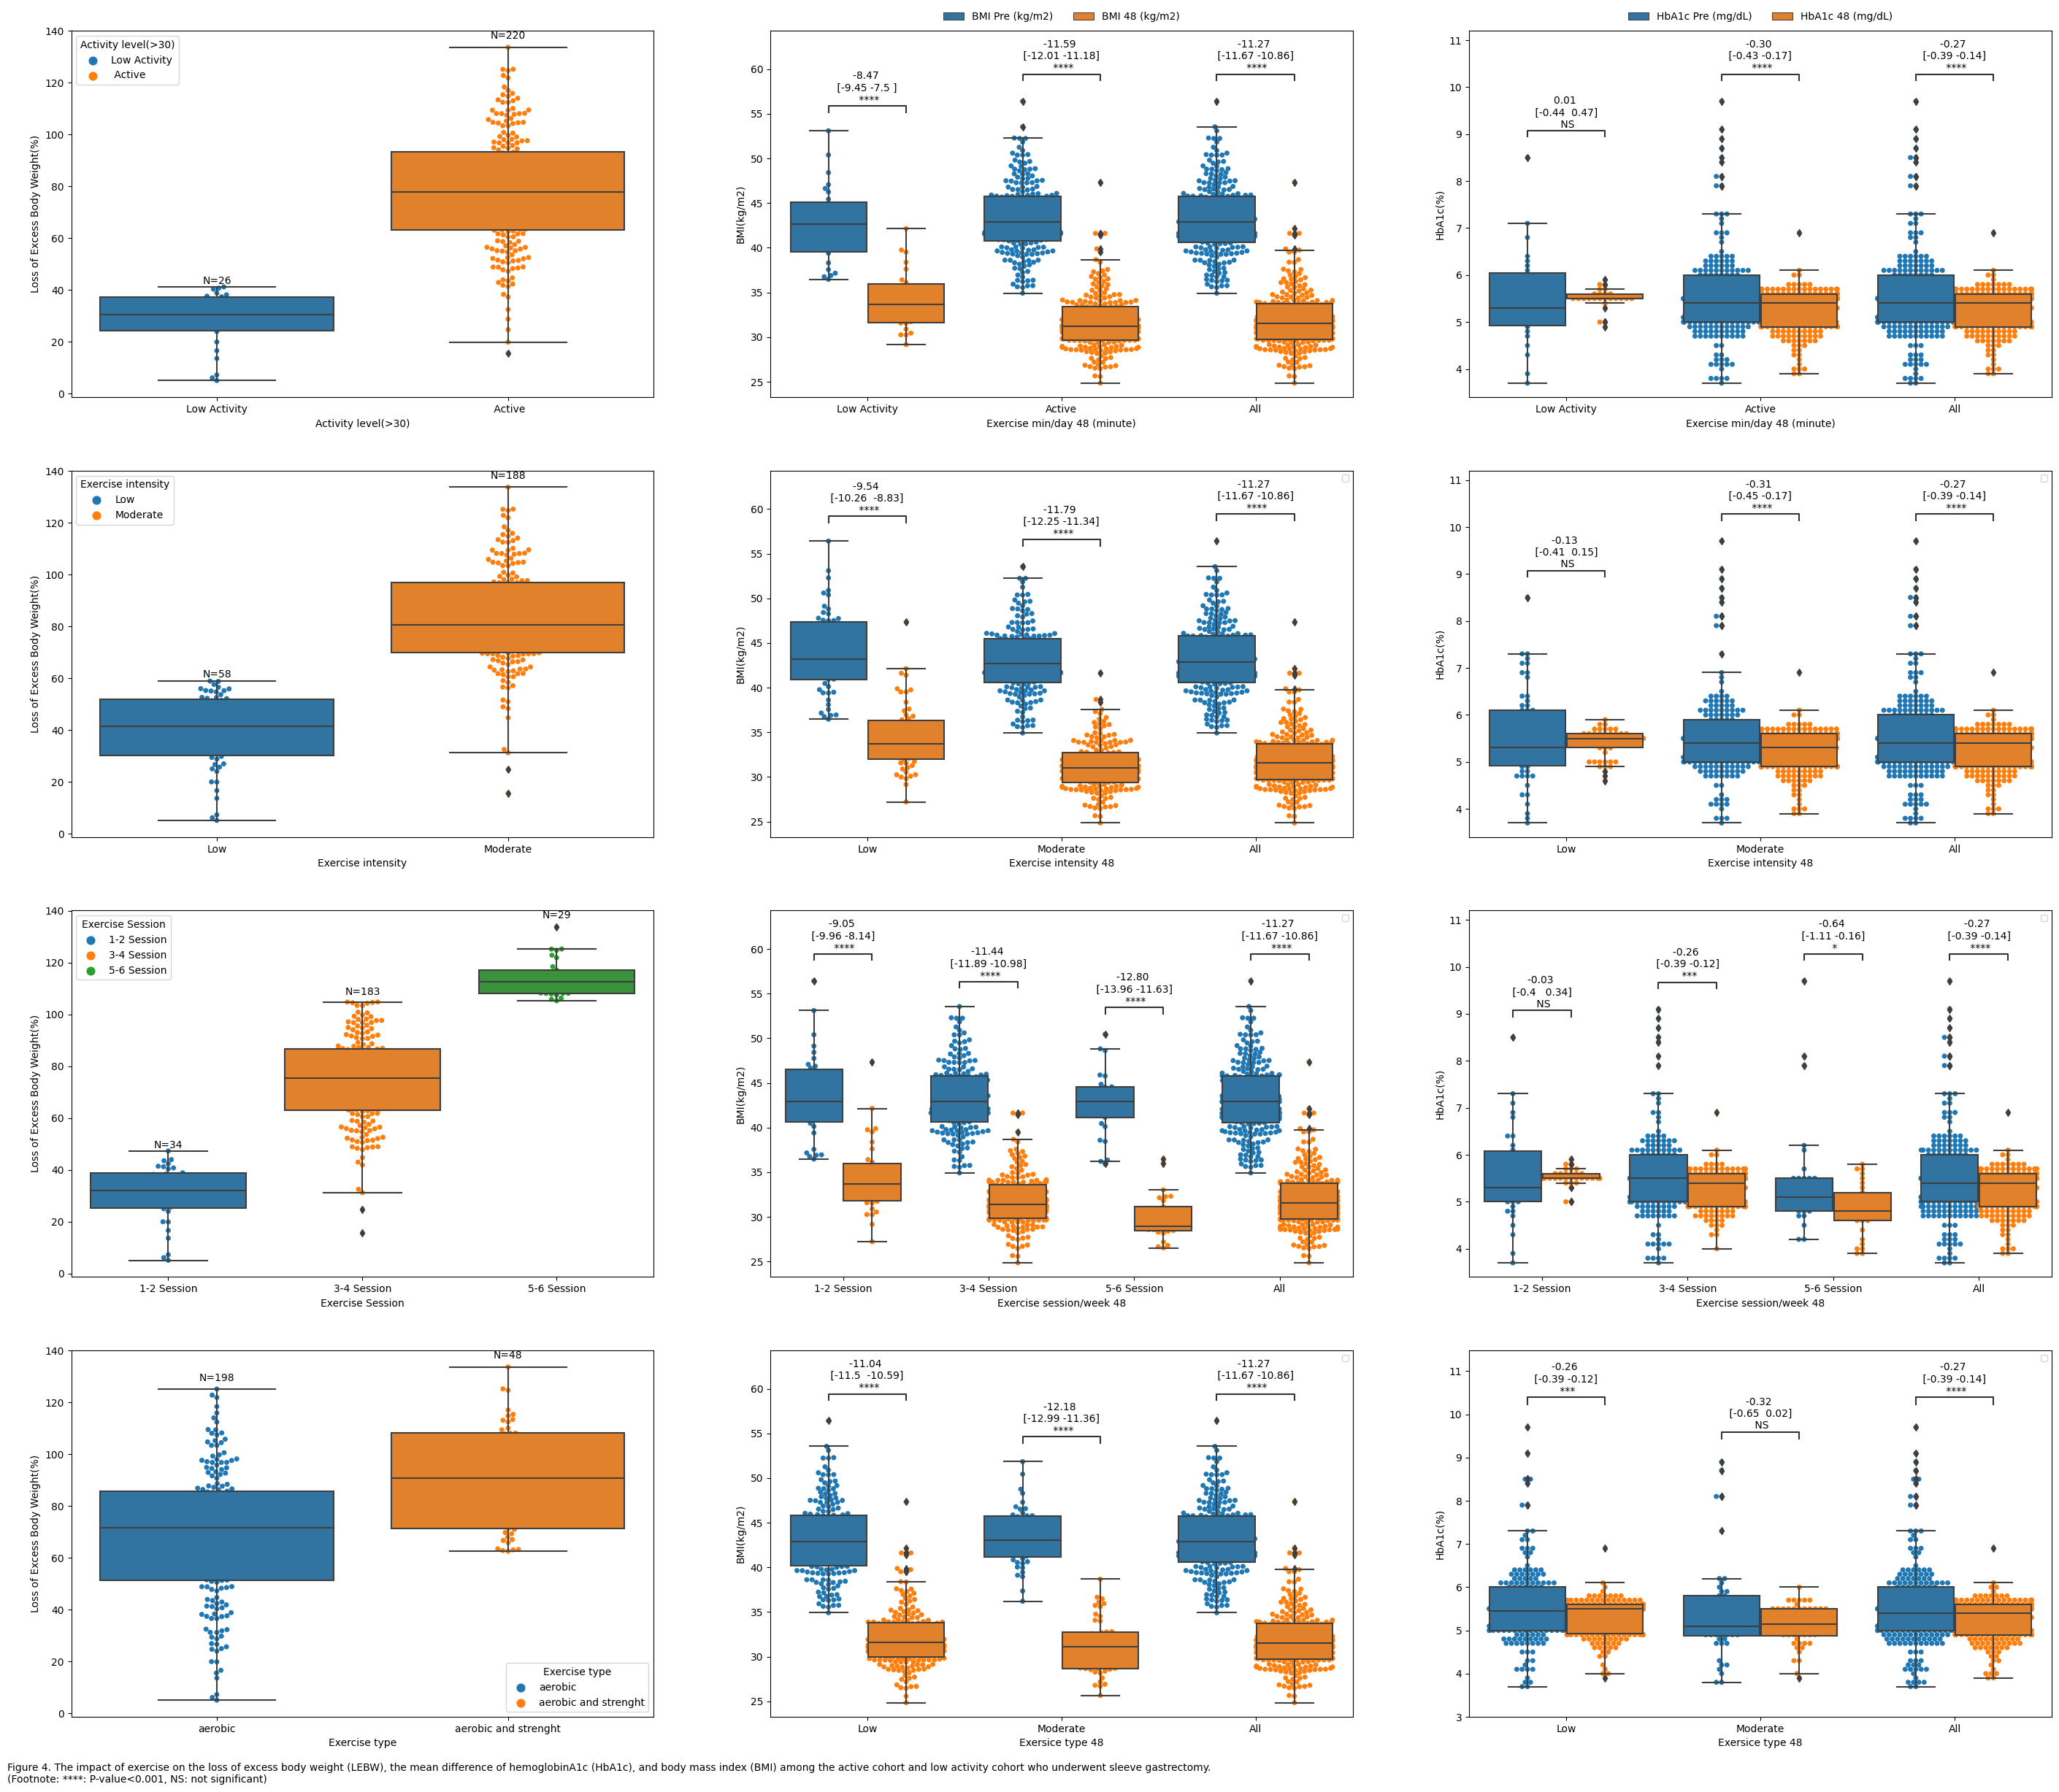

In [15]:
fig, ax=plt.subplots(4,3, figsize=(35,30))

paired_box_plots('Excess weight loss 48 (%)', 'Exercise min/day 48 (minute)',30,'Low Activity', ' Active',  'Loss of Excess Body Weight(%)', 'Activity level(>30)',ax[0,0])
paired_plots ( 'BMI Pre (kg/m2)', 'BMI 48 (kg/m2)', 'Exercise min/day 48 (minute)', 30, 'Low Activity', 'Active', 'All','BMI(kg/m2)',ax[0,1],legend='True')
paired_plots ( 'HbA1c Pre (mg/dL)', 'HbA1c 48 (mg/dL)', 'Exercise min/day 48 (minute)', 30, 'Low Activity', 'Active', 'All','HbA1c(%)',ax[0,2],legend='true')

paired_box_plots('Excess weight loss 48 (%)' , 'Exercise intensity 48',2, 'Low', 'Moderate','Loss of Excess Body Weight(%)', 'Exercise intensity',ax[1,0])
paired_plots ('BMI Pre (kg/m2)', 'BMI 48 (kg/m2)', 'Exercise intensity 48', 2,'Low', 'Moderate', 'All','BMI(kg/m2)',ax[1,1])
paired_plots ('HbA1c Pre (mg/dL)', 'HbA1c 48 (mg/dL)', 'Exercise intensity 48', 2,'Low', 'Moderate', 'All','HbA1c(%)',ax[1,2])

paired_box_plots('Excess weight loss 48 (%)' , 'Exercise session/week 48',5, '1-2 Session', '5-6 Session','Loss of Excess Body Weight(%)', 'Exercise Session',ax[2,0],3,'3-4 Session')
paired_plots ('BMI Pre (kg/m2)', 'BMI 48 (kg/m2)', 'Exercise session/week 48', 5,'1-2 Session', '5-6 Session', 'All','BMI(kg/m2)',ax[2,1], '3-4 Session', 3)
paired_plots ('HbA1c Pre (mg/dL)', 'HbA1c 48 (mg/dL)', 'Exercise session/week 48', 5,'1-2 Session', '5-6 Session', 'All','HbA1c(%)',ax[2,2], '3-4 Session', 3)


paired_box_plots('Excess weight loss 48 (%)' , 'Exersice type 48',2, 'aerobic', 'aerobic and strenght','Loss of Excess Body Weight(%)', 'Exercise type',ax[3,0])
paired_plots ('BMI Pre (kg/m2)', 'BMI 48 (kg/m2)', 'Exersice type 48', 2,'Low', 'Moderate', 'All','BMI(kg/m2)',ax[3,1])
paired_plots ('HbA1c Pre (mg/dL)', 'HbA1c 48 (mg/dL)', 'Exersice type 48', 2,'Low', 'Moderate', 'All','HbA1c(%)',ax[3,2], y_axis_limit='true')

plt.figtext(0.1,0.08,'Figure 4. The impact of exercise on the loss of excess body weight (LEBW), the mean difference of hemoglobinA1c (HbA1c), and body mass index (BMI) among the active cohort and low activity cohort who underwent sleeve gastrectomy.\n(Footnote: ****: P-value<0.001, NS: not significant) ')

